In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]
)
trainset = torchvision.datasets.CIFAR10(root='./data',train=True,download=False,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True,num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data',train=True,download=False,transform=transform)
testloader = torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True,num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

RuntimeError: Dataset not found or corrupted. You can use download=True to download it

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img/2 +0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))

detaiter = iter(trainloader)
images, labels = detaiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s'% classes[labels[j]] for j in range(4)))



NameError: name 'trainloader' is not defined

In [4]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1,16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()

In [5]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr = 0.001, momentum=0.9)

In [6]:
for epoch in range(2):
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999:
            print ('[%d, %5d] loss: %.3f'%
                   (epoch+1, i+1, running_loss/2000))
            running_loss = 0.0
    print ('Finished Training')



[1,  2000] loss: 2.249
[1,  4000] loss: 1.922
[1,  6000] loss: 1.704
[1,  8000] loss: 1.581
[1, 10000] loss: 1.510
[1, 12000] loss: 1.478
Finished Training
[2,  2000] loss: 1.410
[2,  4000] loss: 1.386
[2,  6000] loss: 1.350
[2,  8000] loss: 1.334
[2, 10000] loss: 1.317
[2, 12000] loss: 1.304
Finished Training


In [11]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(),PATH)


('GroundTruth: ', 'truck   dog   cat  deer')
('Predicted: ', 'plane  bird   cat  bird')


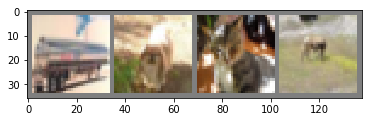

In [12]:
detaiter = iter(testloader)
images, labels = detaiter.next()

imshow(torchvision.utils.make_grid(images))
print ('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
net = Net()
net.load_state_dict(torch.load(PATH))
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))


In [14]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


Accuracy of the network on the 10000 test images: 58 %


In [15]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _,predicted = torch.max(outputs,1)
        # squeeze(): Returns a tensor with all the dimensions of input of size 1 removed.
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
for i in range(10):
    print('Accuracy of %5s : %2d %%'%
          (classes[i], 100 * class_correct[i]/class_total[i]))



Accuracy of plane : 63 %
Accuracy of   car : 60 %
Accuracy of  bird : 43 %
Accuracy of   cat : 32 %
Accuracy of  deer : 56 %
Accuracy of   dog : 35 %
Accuracy of  frog : 76 %
Accuracy of horse : 64 %
Accuracy of  ship : 82 %
Accuracy of truck : 67 %
